# Monte Carlo: Lecture 2 Excercises
_Jose Javier Fernández González_


Implement a Normal random generator, i.e., generate values of the random variable $x$ from uniformly distributed random numbers such that $x$ follows the Normal distribution

$$
p(x) = \frac{1}{\sqrt{2\pi}\,\sigma}\exp\!\left[-\frac{(x-\mu)^2}{2\sigma^2}\right],
$$

where $\mu$ is the mean and $\sigma^2$ the variance, both treated as input parameters.

**Goal: Box–Muller method**

1. Generate two independent uniformly distributed random numbers,  
   $0 < u_1 < 1$ and $0 < u_2 < 1$.

2. Using $u_1$ and $u_2$ define
   $$
   r = \sqrt{-2 \ln u_1}, \qquad \text{radius}
   $$
   $$
   \varphi = 2\pi u_2, \qquad \text{angle / phase}
   $$

3. Compute two independent standard normal random variables,
   $$
   z_0 = r \cdot \cos \varphi,
   $$
   $$
   z_1 = r \cdot \sin \varphi.
   $$

   so that variables $z_0$ and $z_1$ follow a normal distribution with zero mean
   $\mu = 0$ and unit standard deviation $\sigma = 1$.

4. Obtain normally distributed variables with arbitrary mean $\mu$ and standard
   deviation $\sigma > 0$ by adjusting the average value and the standard deviation $\sigma$:
   $$
   x_0 = \mu + \sigma \cdot z_0,
   $$
   $$
   x_1 = \mu + \sigma \cdot z_1.
   $$


In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [2]:
# Function to create an array that follows a normal distribituion
def generate_normal_dist(mean=0., std=1., L:int=1 ):
    # We need to create one u that stores the uniformly distributed values 
    # with size L+1 when L is odd in order to take it by half when constructing values
    total_size = L + L%2
    u = np.random.uniform(size=total_size)

    r = np.sqrt(-2*np.log(u[:int(total_size/2)]))
    phi = 2*np.pi*u[int(total_size/2):]

    z_0 = r * np.cos(phi)
    z_1 = r * np.sin(phi)

    x_0 = mean + std * z_0
    x_1 = mean + std * z_1
    return np.append(x_0,x_1)[:L]

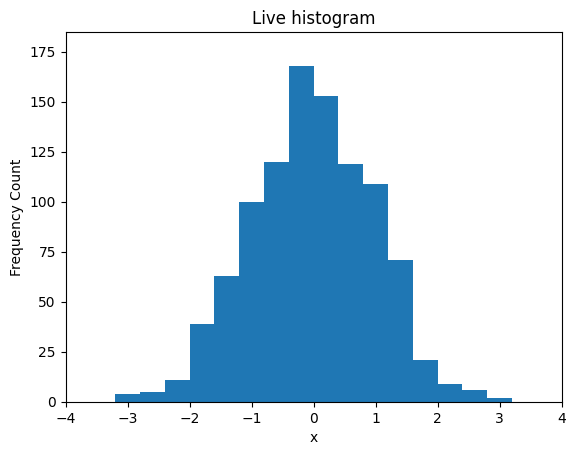

In [3]:
mean=0.
std=1.
num_sigma=4.
num_bins=20
num_iter=1000

# Define Boundaries of the distribution
lower_boundary = mean - std * num_sigma
higher_boundary = mean + std * num_sigma

# Create Bin Limits within the defined limits
bin_limits = np.linspace(
    start = lower_boundary,
    stop = higher_boundary,
    num = num_bins+1
    )
frequency_data = np.zeros(num_bins)

# Precompute bin centers/width for plotting
bin_widths = np.diff(bin_limits)
bin_centers = (bin_limits[:-1] + bin_limits[1:]) / 2

# --- Live plot setup ---
plt.ion()
fig, ax = plt.subplots()
bars = ax.bar(bin_centers, frequency_data, width=bin_widths, align="center")
ax.set_xlim(lower_boundary, higher_boundary)
ax.set_xlabel("x")
ax.set_ylabel("Frequency Count")
ax.set_title("Live histogram")

# Generate Random Value, Register in Frequency Data and Graph in Real Time
for i in range(num_iter):
    
    # Get Value from the Normal Distribution Generator
    current_val = generate_normal_dist(L=1)[0]
    
    # Classify the value in between the bin limits using numpy's searchsorted
    idx = np.searchsorted(bin_limits, current_val, side="right") - 1
    
    # Sum 1 to the count array
    if 0 <= idx < num_bins:
        frequency_data[idx] += 1
    
    # update graph
    for b, h in zip(bars, frequency_data):
        b.set_height(h)

    ax.set_ylim(0, max(1, frequency_data.max() * 1.1))

    clear_output(wait=True)
    display(fig)
    # plt.pause(0.01)

plt.close(fig)

In [4]:
pd.DataFrame({
    "Lower Bin Limit": bin_limits[:-1],
    "Upper Bin Limit": bin_limits[1:],
    "Frequency Count": frequency_data
})

,Lower Bin Limit,Upper Bin Limit,Frequency Count
0,-4.0,-3.6,0.0
1,-3.6,-3.2,0.0
2,-3.2,-2.8,4.0
3,-2.8,-2.4,5.0
4,-2.4,-2.0,11.0
5,-2.0,-1.6,39.0
6,-1.6,-1.2,63.0
7,-1.2,-0.8,100.0
8,-0.8,-0.4,120.0
9,-0.4,0.0,168.0


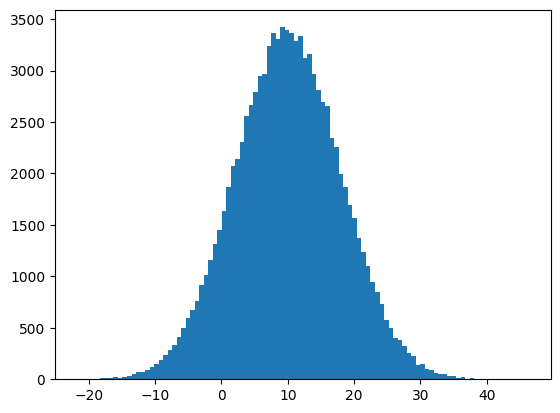

In [5]:
# Testing number generator
plt.hist(generate_normal_dist(mean=10, std=8, L=100000 ), bins=100)
plt.show()